In [1]:
from motor_control import *

Loading BokehJS ...

In [2]:
def motor_curr_pi(kp, ki, R, K, L, J, D):
    num_i=np.poly1d([kp*J, kp*D + ki*J, ki*D])
    num_u=np.poly1d([kp*J*L, kp*J*R+kp*D*L+ki*J*L, kp*D*R+ki*J*R+ki*D*L+K**2*kp, ki*D*R+K**2*ki])
    num_o=np.poly1d([K*kp, K*ki])

    den=np.poly1d([J*L, J*R+D*L+kp*J, D*R+K**2+kp*D+ki*J,ki*D])

    p=np.sort(den.r)
    
    sys_i=tf(num_i, den)
    sys_u=tf(num_u, den)
    sys_o=tf(num_o, den)
    
    #print(J*Z*28/K/0.012)
    
    return(sys_i, sys_u, sys_o ,p)

In [3]:
def motor1724_curr(kp, ki):
    #1724DCモータの諸元
    R=3.41
    K=6.59e-3
    L=75e-6
    D=1.4e-7
    Jm=1e-7

    Z=4.6#ギヤ比

    #質量をモータ軸慣性モーメントに変換
    Jb=(0.012/Z)**2*0.04
    J=Jm+Jb

    return motor_curr_pi(kp, ki, R, K, L, J, D)

In [4]:
def motor1717_curr(kp, ki):
    #1717DCモータの諸元
    R=1.07
    K=1.98e-3
    L=17e-6
    D=1.226e-7
    Jm=0.59e-7

    Z=4.6#ギヤ比
    
    #質量をモータ軸慣性モーメントに変換
    Jb=(0.012/Z)**2*0.04
    
    J=Jm+Jb
    #print('J=',J)
    return motor_curr_pi(kp, ki, R, K, L, J, D)

In [92]:
sys_i,sys_u, sys_o, sys_pole=motor1717_curr(1.7, 112000.0)

endtime=0.001
ti,yi=step(sys_i, 0, endtime, step=10000, debug=True)
tu,yu=step(sys_u, 0, endtime, step=10000, debug=True)
to,yo=step(sys_o, 0, endtime, step=10000, debug=True)

ref=1.8
TierR=0.012
Z=4.6


order=3
Pole=[-8.84365902e+04 -7.45045863e+04 -3.70116868e-01]
k1=-1.8305540969251577
k2=0.8306597704700895
k3=-0.00010567354492992913
k4=1.0000000000000002
order=3
Pole=[-8.84365902e+04 -7.45045863e+04 -3.70116868e-01]
k1=0.7936474853187373
k2=-0.16342137659413777
k3=-31.977387609540255
k4=33.04716150081566
order=3
Pole=[-8.84365902e+04 -7.45045863e+04 -3.70116868e-01]
k1=0.12374050671088084
k2=-0.06665025599300657
k3=-16150.138656319228
k4=16150.081566068511


In [93]:
p1 = figure(plot_height=200, 
            plot_width=800,
            background_fill_color='#efefef',
            x_axis_label='Time(s)',
            y_axis_label='Current(A)',
            
)
p1.add_tools(HoverTool(),CrosshairTool())

p1.line(ti, yi*ref, color="#bb0000", line_width=3.0, alpha=0.8)

p2 = figure(plot_height=200, 
            plot_width=800,
            background_fill_color='#efefef',
            x_axis_label='Time(s)',
            y_axis_label='Input(V)',
            
)
p2.add_tools(HoverTool(),CrosshairTool())

p2.line(tu, yu*ref, color="#00bb00", line_width=3.0, alpha=0.8)

p3 = figure(plot_height=200, 
            plot_width=800,
            background_fill_color='#efefef',
            x_axis_label='Time(s)',
            y_axis_label='Velocity(m/s)',
            
)
p3.add_tools(HoverTool(),CrosshairTool())

p3.line(to, yo*ref*TierR/Z, color="#0000bb", line_width=3.0, alpha=0.8)

show(column(p1,p2,p3))

あささんの最大加速２８m/s^2


In [88]:
#根軌跡

p=[[],[],[]]
kps=np.linspace(1000,1000000,1000)
for kp in kps:
    _, _, _, sys_pole=motor1717_curr(1.7, kp)
    sys_pole=sys_pole+0j
    #print(sys_pole)

    #print(sys_pole[0], sys_pole[1], sys_pole[2])

    p[0].append(sys_pole[0])
    p[1].append(sys_pole[1])
    p[2].append(sys_pole[2])

p=np.array(p) 

phoge=figure(plot_height=400, 
            plot_width=550)
phoge.scatter(p[0].real, p[0].imag, color='#ff0000',size=5,alpha=0.5,marker='circle')
phoge.scatter(p[1].real, p[1].imag, color='#00ff00',size=5,alpha=0.5,marker='square')
phoge.scatter(p[2].real, p[2].imag, color='#0000ff',size=10,alpha=0.5,marker='triangle')
phoge.add_tools(HoverTool(),CrosshairTool())
show(phoge)

In [89]:
kps[111]

112000.0

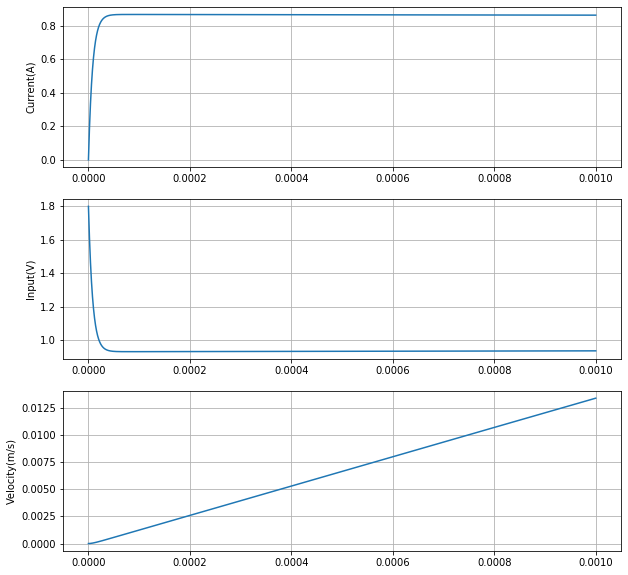

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(ti,yi*ref)
plt.grid()
plt.ylabel('Current(A)')
plt.subplot(312)
plt.plot(tu,yu*ref)
plt.grid()
plt.ylabel('Input(V)')
plt.subplot(313)
plt.plot(to,yo*ref*TierR/Z)
plt.grid()
plt.ylabel('Velocity(m/s)')
plt.show()